
## Задание

    1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
    2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
    3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
    4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
    5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
    6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
    7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
    8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
    9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
    10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
    11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

Приведенная схема исследования является рекомендуемой. В зависимости от решаемой задачи возможны модификации.


## 1. Выбор и подготовка набора данных.

В качестве набора данных будем использовать набор Diabetes Health Indicators Dataset (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). Решение данной задачи позволит обнаруживать и предсказывать наличие у человека, такого неприятного заболевания как диабет, по его анализам и образу жизни. При построении успешной модели можно будет прогнозировать результат заранее, что позволит предупредить её развитие.

Наш csv содержит следующие поля:

- Diabetes_binary - 1 - Есть Диабет/ 0 - Диабета нет.
- HighBP - 1 - Высокое кровяное давление/ 0 - низкое кровяное давление.
- HighChol - 1 - Высокое содержание холестерина/ 0 - Низкое содержание холестерина
- CholCheck - 1 - Проверял содержание холестерина в течении последних 5-ти лет / 0 - не проверял
- BMI - Индекс массы тела
- Smoker - Курил ли человека более 100 сигарет за свою жизнь? Да - 1/ Нет - 0
- Stroke - Был ли у человека инсульт? Да - 1/ Нет - 0.
- HeartDiseaseorAttack - Ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ) 0 = нет 1 = да
- PhysActivity - Физическая активность за последние 30 дней, не включая работу 0 = нет 1 = да
- Fruits - Употребляет фрукты 1 или более раз в день 0 = нет 1 = да
- Veggies - Употребляет овощи 1 или более раз в день 0 = нет 1 = да
- HvyAlcoholConsumption - Сильно пьющие (взрослые мужчины, употребляющие более 14 порций алкоголя в неделю, и взрослые женщины, употребляющие более 7 порций алкоголя в неделю) 0 = нет
- AnyHealthcare - Иметь какое-либо медицинское страхование, включая медицинскую страховку, предоплаченные планы, такие как HMO и т. д. 0 = нет 1 = да 
- NoDocbcCost - Были ли случаи за последние 12 месяцев, когда вам нужно было обратиться к врачу, но вы не могли этого сделать из-за стоимости? 0 = нет 1 = да
- GenHlth - Могли бы вы сказать, что в целом ваше здоровье: по шкале от 1 до 5 1 = отличное 2 = очень хорошее 3 = хорошее 4 = удовлетворительное 5 = плохое
- MentHlth - Теперь подумайте о своем психическом здоровье, которое включает стресс, депрессию и проблемы с эмоциями, о том, как
- PhysHlth - Теперь подумайте о своем физическом здоровье, которое включает в себя физические болезни и травмы, сколько дней в течение последних 30 дней
- DiffWalk - Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице? 0 = нет 1 = да
- Sex - 0 = женский 1 = мужской
- Age - 13-уровневая возрастная категория (_AGEG5YR, см. кодовую книгу) 1 = 18–24 года 9 = 60–64 года 13 = 80 лет или старше
- Education - Уровень образования (EDUCA см. кодовую книгу)
- Income - Шкала доходов (INCOME2 см. кодовую книгу)

Будем решать задачу бинарной классификации - наличие диабета у человека

#### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

/home/artyom/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/artyom/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


#### Загрузка данных

In [3]:
data = pd.read_csv('./diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [4]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
print(f'Внутри набора данных {data.shape[0]} строк и {data.shape[1]} колонн.') 

Внутри набора данных 70692 строк и 22 колонн.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [8]:
data = data.astype('int')

## 2. Разведочный анализ

In [7]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
total = data.shape[0]
class_0, class_1 = data['Diabetes_binary'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 50.0%, а класс 1 составляет 50.0%.


Как можно заметить набор данных является сбалансированным.

In [10]:
mini_data = data.sample(frac=1)
mini_data = mini_data[:10]
sns.pairplot(mini_data, hue='Diabetes_binary')

KeyboardInterrupt: 

In [ ]:
for col in ['Age', 'Education', 'Income', 'BMI', 'PhysHlth']:
    sns.violinplot(x=data[col])
    plt.show()

<AxesSubplot:>

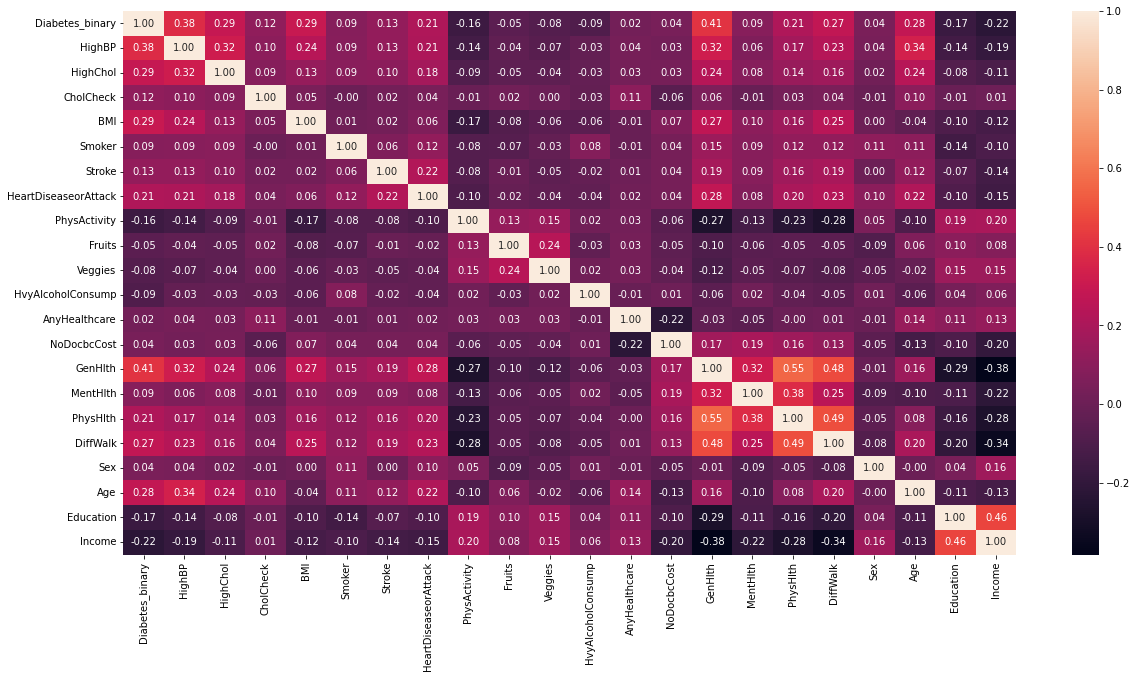

In [10]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [11]:
data['Diabetes_binary'].value_counts()

0    35346
1    35346
Name: Diabetes_binary, dtype: int64

In [18]:
X = data.drop(['Diabetes_binary'],axis=1)
Y = data['Diabetes_binary']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
counter = Counter(Y_train)
print(counter)

Counter({1: 28297, 0: 28256})


In [22]:
X_train.shape, Y_train.shape

((56553, 21), (56553,))

In [25]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [27]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 74.81%
Best Parameters :  {'C': 0.5, 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 71.93%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

DecisionTreeClassifier():
Best Accuracy : 65.98%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 73.94%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------

AdaBoostClassifier():
Best Accuracy : 75.01%
Best Parameters :  {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 150, 'random_state': 0}

----------------



KeyboardInterrupt: 